In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib notebook

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
props_2017 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2017.csv")

In [3]:
#Transformo las fechas al formato tipo fecha.
props_2017['created_on'] = pd.to_datetime(props_2017['created_on'],format='%Y-%m-%d')

In [4]:
props_2017.dtypes

Unnamed: 0                             int64
id                                    object
created_on                    datetime64[ns]
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [5]:
props_2017 = props_2017[(props_2017['created_on'] >= '2017-01-01') & (props_2017['created_on'] <= '2017-08-31')]

In [6]:
props_2017.head(2)

,Unnamed: 0,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
24271,35364,e3cb52c36e2210586ddf90fd0443261ea2e5511f,2017-01-01,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.744616,-58.277365",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corredor Responsable: Martin Veltri - C.M.Q 80...,Casa en Venta Quilmes
24272,35366,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,109000.0,NaN,43.0,NaN,2534.883721,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA


In [7]:
caba = props_2017[props_2017.state_name == 'Capital Federal']
caba.head(2)

,Unnamed: 0,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
24272,35366,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,109000.0,NaN,43.0,NaN,2534.883721,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA
24273,35367,5a66865f29a02dbfa89d04ad66e91162c368eb99,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,89900.0,NaN,38.0,NaN,2365.789474,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 Ambientes / Monoambiente con balcon a estrenar


In [8]:
caba.groupby('property_type').count()
#Existen 4 tipos de propiedades: PH, apartamento, casa y local

,Unnamed: 0,id,created_on,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
property_type,,,,,,,,,,,,,,,,,,,,,
PH,7194,7194,7194,7194,7194,7194,7194,6927,6765,6765,...,6874,5167,6853,4818,6528,695,5648,635,7194,7194
apartment,91484,91484,91484,91484,91484,91484,91484,87445,76192,76192,...,83061,73925,87440,65734,79561,17712,66431,19139,91484,91484
house,8235,8235,8235,8235,8235,8235,8235,8000,6094,6094,...,7217,6246,7533,5322,6630,22,3266,64,8235,8235
store,4252,4252,4252,4252,4252,4252,4252,4059,3855,3855,...,3625,3284,3848,2679,3203,34,274,434,4252,4252


In [9]:
#Removemos las propiedades que no tienen metraje
caba = caba[caba.surface_covered_in_m2 != 0]

In [10]:
#Para cada barrio teniendo en cuenta la frecuencia venta ordenamos descendentemente.
#Vamos a asignarle el número de comuna a la que corresponde cada barrio.
def set_comuna(place_name):
    p = str(place_name)
    if p == 'Retiro' or p == 'San Nicolás' or p == 'Puerto Madero' or p == 'San Telmo' or p == 'Monserrat' or p == 'Constitución':
        return 1
    if p == 'Recoleta':
        return 2
    if p == 'San Cristobal' or p == 'Balvanera':
        return 3
    if p == 'Boca' or p == 'Barracas' or p == 'Parque Patricios' or p == 'Pompeya':
        return 4
    if p == 'Almagro' or p == 'Boedo':
        return 5
    if p == 'Caballito':
        return 6
    if p == 'Flores' or p == 'Parque Chacabuco':
        return 7
    if p == 'Villa Soldati' or p == 'Villa Riachuelo' or p == 'Villa Lugano':
        return 8
    if p == 'Parque Avellaneda' or p == 'Liniers' or p == 'Mataderos':
        return 9
    if p == 'Villa Real' or p == 'Monte Castro' or p == 'Versalles' or p == 'Floresta' or p == 'Velez Sarsfield' or p == 'Villa Luro':
        return 10
    if p == 'Villa General Mitre' or p == 'Villa Devoto' or p == 'Villa del Parque' or p == 'Villa Santa Rita':
        return 11
    if p == 'Coghlan' or p == 'Saavedra' or p == 'Villa Urquiza' or p == 'Villa Pueyrredón':
        return 12
    if p == 'Belgrano' or p == 'Nuñez' or p == 'Colegiales':
        return 13
    if p == 'Palermo' or p == 'Palermo Hollywood' or p == 'Palermo Soho' or p == 'Palermo Chico' or p == 'Palermo Viejo':
        return 14
    if p == 'Chacarita' or p == 'Agronomía' or p == 'Villa Crespo' or p =='Villa Ortuzar':
        return 15

In [11]:
caba['comuna'] = caba['place_name'].apply(set_comuna)

In [12]:
caba.head(2)

,Unnamed: 0,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,comuna
24272,35366,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,NaN,43.0,NaN,2534.883721,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA,12.0
24273,35367,5a66865f29a02dbfa89d04ad66e91162c368eb99,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,NaN,38.0,NaN,2365.789474,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 Ambientes / Monoambiente con balcon a estrenar,12.0


In [18]:
c_prop_type = caba.groupby(['comuna','property_type']).count()['id'].reset_index()

In [21]:
c_prop_type.head(2)

,comuna,property_type,id
0,1.0,PH,313
1,1.0,apartment,8382


In [43]:
cpt = c_prop_type[['comuna','property_type','id']].rename(columns={'id':'count'})

In [194]:
a = cpt[cpt['property_type'] == 'PH'].sort_values('comuna').reset_index()
b = cpt[cpt['property_type'] == 'house'].sort_values('comuna').reset_index()
c = cpt[cpt['property_type'] == 'apartment'].sort_values('comuna').reset_index()

In [196]:
c.head(3)

,index,comuna,property_type,count
0,1,1.0,apartment,8382
1,5,2.0,apartment,4867
2,9,3.0,apartment,4687


In [204]:
a['count_house'] = b['count']
a = a.rename(columns={'count':'count_ph'})
a = a.drop(['property_type'],1)

In [208]:
a['count_apartament'] = c['count']
a = a.drop(['index'],1)

ValueError: labels ['index'] not contained in axis

<IPython.core.display.Javascript object>


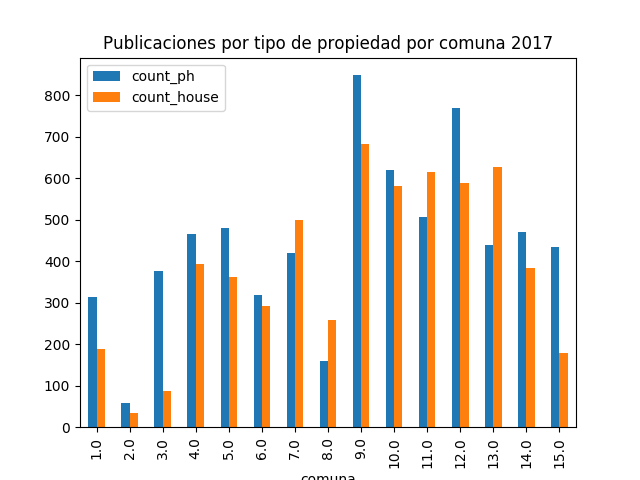

In [237]:
a1 = a[['comuna','count_ph','count_house']]
a1.plot(kind='bar',x='comuna',title="Publicaciones por tipo de propiedad por comuna 2017")
#a1.plot(kind='bar',x='comuna',title='Publicaciones de PH y casas por comuna")

<IPython.core.display.Javascript object>


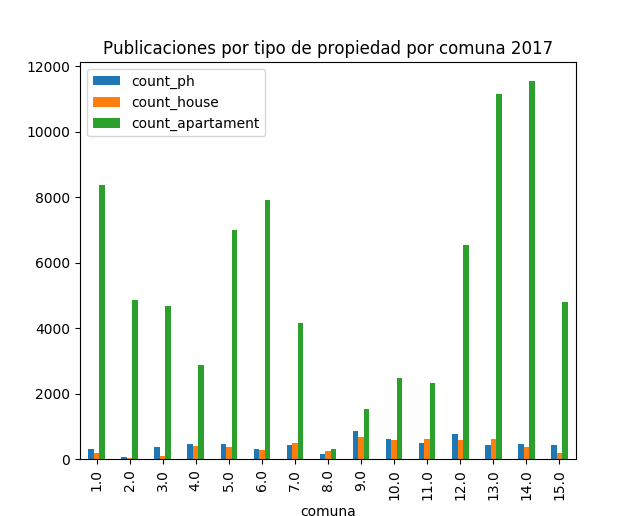

In [239]:
a.plot(kind='bar',x='comuna',title="Publicaciones por tipo de propiedad por comuna 2017")

In [225]:
props_2016 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2016.csv")
#props_2015 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2015.csv")

In [226]:
props_2016 = props_2016[(props_2016['created_on'] >= '2016-01-01') & (props_2016['created_on'] <= '2016-12-31')]

In [229]:
#Transformo las fechas al formato tipo fecha.
props_2016['created_on'] = pd.to_datetime(props_2016['created_on'],format='%Y-%m-%d')

In [230]:
caba_16 = props_2016[props_2016.state_name == 'Capital Federal']
#Removemos las propiedades que no tienen metraje
caba_16 = caba_16[caba_16.surface_covered_in_m2 != 0]
caba_16['comuna'] = caba_16['place_name'].apply(set_comuna)
c_prop_type_16 = caba_16.groupby(['comuna','property_type']).count()['id'].reset_index()
cpt_16 = c_prop_type_16[['comuna','property_type','id']].rename(columns={'id':'count'})

In [232]:
a2 = cpt_16[cpt_16['property_type'] == 'PH'].sort_values('comuna').reset_index()
b2 = cpt_16[cpt_16['property_type'] == 'house'].sort_values('comuna').reset_index()
#c = cpt_16[cpt_16['property_type'] == 'apartment'].sort_values('comuna').reset_index()

a2['count_house'] = b2['count']
a2 = a2.rename(columns={'count':'count_ph'})
a2 = a2.drop(['property_type'],1)

In [233]:
props_2016.dtypes

Unnamed: 0                             int64
id                                    object
created_on                    datetime64[ns]
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

<IPython.core.display.Javascript object>


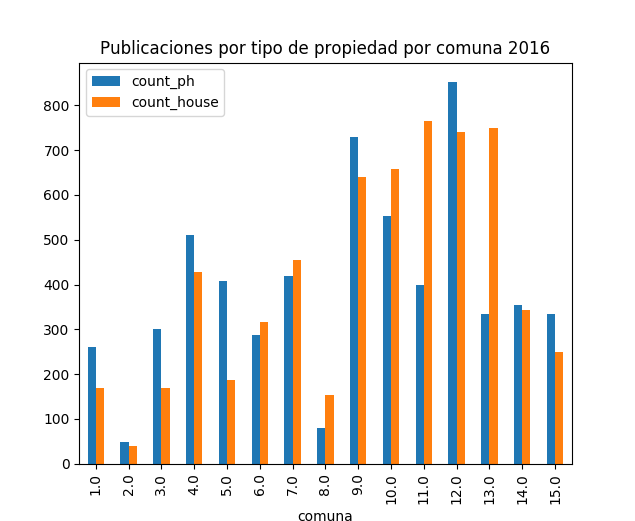

In [238]:
a2a = a2[['comuna','count_ph','count_house']]
a2a.plot(kind='bar',x='comuna',title="Publicaciones por tipo de propiedad por comuna 2016")